# MA755 - Team Sandbox

Material from

> "[Hands-On Machine Learning with Scikit-Learn and TensorFlow](http://shop.oreilly.com/product/0636920052289.do)"<br>
by Aurélien Géron
Published by O'Reilly Media, Inc., 2017

Annotations, comments, and implementation on dataset by Angela Su, Tyler Miguel, Sebastian Bury

to do

- Import data
- shrink photos
- train/label (might need to handcode these)
- train model
- get features
- predict on test
- conclude

# Load Libraries 

In [156]:
from __future__ import division, print_function, absolute_import
from skimage import color, io
from scipy.misc import imresize
import numpy as np
import tensorflow as tf
from tensorflow.contrib import learn
from tensorflow.contrib.learn.python.learn.estimators import model_fn as model_fn_lib
from sklearn.cross_validation import train_test_split
import os
from glob import glob

In [ ]:
# might need to use tensor flow libraries

import tflearn
from tflearn.data_utils import shuffle, to_categorical
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation
from tflearn.metrics import Accuracy

# Import Data

In [77]:
files_path = 'datasets/catsndogs/train/'

In [86]:
cat_files_path = os.path.join(files_path, 'cat.*.jpg')
dog_files_path = os.path.join(files_path, 'dog.*.jpg')

In [87]:
cat_files_path

'datasets/catsndogs/train/cat.*.jpg'

In [88]:
cat_files = sorted(glob(cat_files_path))
dog_files = sorted(glob(dog_files_path))

In [89]:
n_files = len(cat_files) + len(dog_files)
print(n_files)

25000


# Take a look at the data

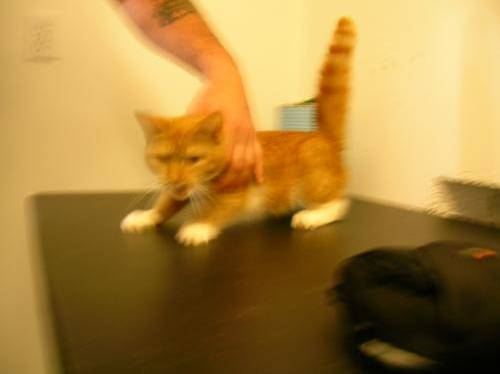

In [148]:
from IPython.display import Image 
Image(filename=files_path+'/cat.0.jpg')

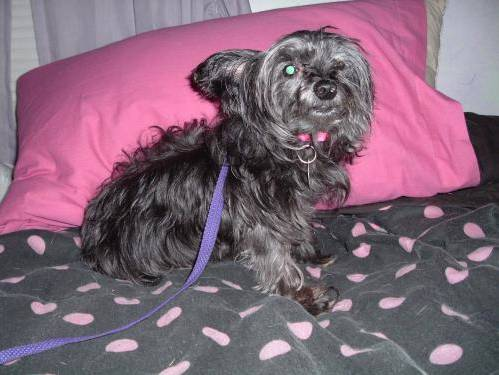

In [149]:
Image(filename=files_path+'/dog.0.jpg')

# resize images

In [207]:
size_image = 28

allX = np.zeros((n_files, size_image, size_image, 3), dtype='float32')
ally = np.zeros(n_files, dtype='int32')
count = 0
for f in cat_files:
    try:
        img = io.imread(f)
        new_img = imresize(img, (size_image, size_image, 3))
        allX[count] = np.array(new_img)
        ally[count] = 0
        count += 1
    except:
        continue

In [209]:
for f in dog_files:
    try:
        img = io.imread(f)
        new_img = imresize(img, (size_image, size_image, 3))
        allX[count] = np.array(new_img)
        ally[count] = 1
        count += 1
    except:
        continue

# simple example of creating one convoluted layer

In [146]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

In [115]:
np.array(allX[0:2], dtype=np.float32).shape

(2, 28, 28, 3)

In [117]:
data_point = np.array(allX[0:2], dtype=np.float32)
batch_size, height, width, channels = (data_point.shape)

In [122]:
# Create 2 filters
import tensorflow as tf

filters_test = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32) 
filters_test[:, 3, :, 0] = 1 # vertical line
filters_test[3, :, :, 1] = 1 # horizontal line

In [125]:
# Create a graph with input X plus a convolutional layer applying the 2 filters
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters_test, strides=[1,2,2,1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: data_point})

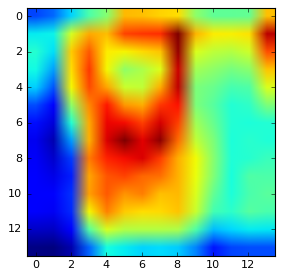

In [131]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.imshow(output[1, :, :, 0]) #plot 1st image's 2nd feature map 
plt.show()

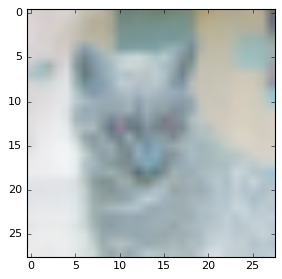

In [134]:
plt.imshow(allX[1])
plt.show()

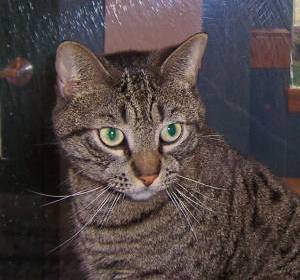

In [138]:
from IPython.display import Image 
Image(filename='datasets/catsndogs/train/cat.1.jpg')

# simple example of creating one pooling layer

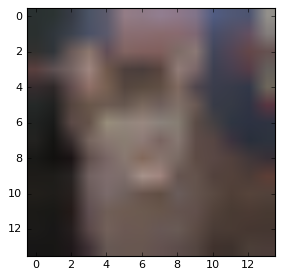

In [143]:
# Create a graph with input X plus a max pooling layer
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1],padding="VALID")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: data_point})

plt.imshow(output[1].astype(np.uint8)) # plot the output for the 1st image 
plt.show()

# split the data

In [151]:
from tensorflow.contrib.layers import fully_connected

In [211]:
X, X_test, Y, Y_test = train_test_split(allX, ally, test_size=0.1, random_state=42)

In [186]:
# from own and https://pythonprogramming.net/convolutional-neural-network-kats-vs-dogs-machine-learning-tutorial/

In [100]:
tf.reset_default_graph()

convnet = tf.placeholder(tf.float32, shape=(None, height, width, channels))

convnet = tf.nn.conv2d(covnet, filters_test, strides=[1,2,2,1], padding="SAME")
convnet = tf.nn.max_pool(covnet, ksize=[1,2,2,1], strides=[1,2,2,1],padding="VALID")

logits = fully_connected(hidden2, n_outputs, scope="outputs",
                                 activation_fn=None)

logits = tf.contrib.layers.fully_connected(convnet, 2, scope="outputs", activation_fn=None)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, 
                     loss='categorical_crossentropy', name='targets')


NameError: name 'to_categorical' is not defined

In [ ]:
model = tflearn.DNN(convnet, tensorboard_dir='log')



if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

train = train_data[:-500]
test = train_data[-500:]

X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]

model.fit({'input': X}, {'targets': Y}, n_epoch=3, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

In [ ]:


X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,1,1,1], 
                           padding="SAME", use_cudnn_on_gpu=False)

In [ ]:
# from google https://www.tensorflow.org/tutorials/layers

In [157]:
tf.reset_default_graph()

def cnn_model_fn(features, labels, mode):
    """Model function for CNN."""
    # Input Layer
    input_layer = tf.reshape(features, [-1, 28, 28, 1])
    
    # Convolutional Layer #1
    conv1 = tf.layers.conv2d(
        inputs=input_layer,
        filters=32,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)
    
    # Pooling Layer #1
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
    
    # Convolutional Layer #2 and Pooling Layer #2
    conv2 = tf.layers.conv2d(
        inputs=pool1,
        filters=64,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)
    
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)
    
    # Dense Layer
    pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])
    dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
    dropout = tf.layers.dropout(
        inputs=dense, rate=0.4, training=mode == learn.ModeKeys.TRAIN)
    
    # Logits Layer
    logits = tf.layers.dense(inputs=dropout, units=10)
    
    loss = None
    train_op = None
    
    # Calculate Loss (for both TRAIN and EVAL modes)
    if mode != learn.ModeKeys.INFER:
        onehot_labels = tf.one_hot(indices=tf.cast(labels, tf.int32), depth=10)
        loss = tf.losses.softmax_cross_entropy(
            onehot_labels=onehot_labels, logits=logits)
        
    # Configure the Training Op (for TRAIN mode)
    if mode == learn.ModeKeys.TRAIN:
        train_op = tf.contrib.layers.optimize_loss(
            loss=loss,
            global_step=tf.contrib.framework.get_global_step(),
            learning_rate=0.001,
            optimizer="SGD")

    # Generate Predictions
    predictions = {
        "classes": tf.argmax(
            input=logits, axis=1),
        "probabilities": tf.nn.softmax(
            logits, name="softmax_tensor")
    }
    # Return a ModelFnOps object
    return model_fn_lib.ModelFnOps(
        mode=mode, predictions=predictions, loss=loss, train_op=train_op)

In [161]:
cd_classifier = learn.Estimator(
      model_fn=cnn_model_fn, model_dir="/tempforcnn")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_environment': 'local', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_is_chief': True, '_save_checkpoints_secs': 600, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_model_dir': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x134376cf8>, '_keep_checkpoint_every_n_hours': 10000, '_master': '', '_task_type': None, '_save_summary_steps': 100, '_task_id': 0, '_evaluation_master': ''}


In [162]:
tensors_to_log = {"probabilities": "softmax_tensor"}
logging_hook = tf.train.LoggingTensorHook(
    tensors=tensors_to_log, every_n_iter=50)

In [212]:
cd_classifier.fit(
    x=X[0:100],
    y=Y[0:100],
    batch_size=10,
    steps=1000,
    monitors=[logging_hook])

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


/Users/tylermiguel/anaconda/lib/python3.5/site-packages/tensorflow/python/util/deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


ValueError: Features are incompatible with given information. Given features: Tensor("input:0", shape=(?, 28, 28, 3), dtype=float32), required signatures: TensorSignature(dtype=tf.float64, shape=TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(3)]), is_sparse=False).

In [199]:
X[0:100].dtype

dtype('float64')

In [ ]:
cnn_model_fn(X[0:10], Y[0:10], mode)

In [166]:
type(X[0:10])

tensorflow.python.framework.ops.Tensor

In [200]:
mnist = learn.datasets.load_dataset("mnist")

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [201]:
train_data = mnist.train.images # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images # Returns np.array
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)